In [1]:
import numpy as np
import scipy.io as sio
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [2]:
data = sio.loadmat('dataset.mat')
D = data['D']
X = data['X']

(a)

In [36]:
W_a = inv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(D))
W_a

array([[-0.9993219 ],
       [ 1.00061145],
       [-2.00031968]])

In [37]:
D_hat = X.dot(W_a)

In [5]:
np.mean((D_hat - D)**2)

0.00010079903131736786

(b)

In [3]:
W = np.zeros((3,1))
r = 0.01
epoch = 20

In [4]:
mse = np.zeros((epoch,1))
for i in range(epoch):
    for j in range(X.shape[0]):
        D_pred = X[j].dot(W)
        W = W + r*np.reshape(X[j,:],(3,1))*(D[j]-D_pred)
    mse[i] = np.mean((X.dot(W) - D)**2)

In [5]:
W

array([[-0.99925144],
       [ 1.00082858],
       [-2.00068123]])

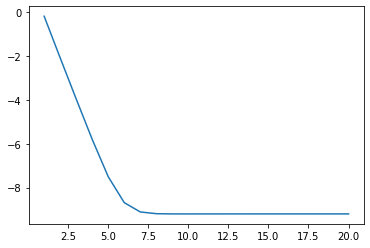

In [6]:
plt.plot(list(range(1,epoch+1,1)), np.log(mse))

In [112]:
list(range(1,epoch+1,1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

(c)

In [10]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

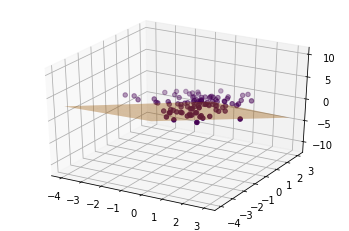

In [48]:
fig = plt.figure()
ax = plt.axes(projection='3d')
zdata = X[:,0]
xdata = X[:,1]
ydata = X[:,2]

xx, yy = np.meshgrid(range(-4,4), range(-4,4))
z = W[0] + W[1]*xx + W[2]*yy 
z_a = W_a[0] + W_a[1]*xx + W_a[2]*yy 

# plot the plane
ax.plot_surface(xx, yy, z, alpha=0.2, color = 'yellow')
ax.plot_surface(xx, yy, z_a, alpha=0.2,color = 'red')
ax.scatter3D(xdata, ydata, zdata, c=zdata)

(d)

In [7]:
def calc_mse(r,epoch = 20):
    W = np.zeros((3,1))
    mse = np.zeros((epoch,1))
    for i in range(epoch):
        for j in range(X.shape[0]):
            D_pred = X[j].dot(W)
            W = W + r*np.reshape(X[j,:],(3,1))*(D[j]-D_pred)
        mse[i] = np.mean((X.dot(W) - D)**2)
    return mse

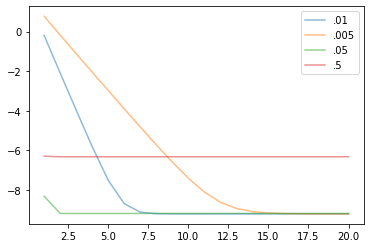

In [8]:
plt.plot(list(range(1,epoch+1,1)), np.log(mse), alpha = 0.5, label = '.01')
plt.plot(list(range(1,epoch+1,1)), np.log(calc_mse(0.005)),alpha = 0.5, label = '.005')
plt.plot(list(range(1,epoch+1,1)), np.log(calc_mse(0.05)),alpha = 0.5, label = '.05')
plt.plot(list(range(1,epoch+1,1)), np.log(calc_mse(0.5)),alpha = 0.5, label = '.5')
plt.legend()

In [67]:
calc_mse(1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  


array([[1.63803420e+020],
       [1.06303198e+039],
       [6.89873718e+057],
       [4.47705953e+076],
       [2.90546827e+095],
       [1.88555587e+114],
       [1.22366538e+133],
       [7.94119650e+151],
       [5.15358224e+170],
       [3.34450985e+189],
       [2.17047980e+208],
       [1.40857189e+227],
       [9.14118050e+245],
       [5.93233343e+264],
       [3.84989444e+283],
       [2.49845821e+302],
       [            inf],
       [            inf],
       [            inf],
       [            inf]])